In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.simplefilter(action='ignore', category=FutureWarning)
# modelnames = ['Complex_Watson','Complex_ACG','MACG','SingularWishart']
# modelnames2 = ['Complex Watson (K=1)','Complex ACG (K=1)','MACG (K=1)','Singular Wishart (K=1)']
# modelnames3 = ['Complex Watson','Complex ACG','MACG','Singular Wishart']
modelnames = ['Complex_Watson','Complex_ACG']
from src.helper_functions import calc_NMI

In [28]:
#rank data
df = pd.DataFrame()
for modelname in modelnames[1:]:
    df_tmp = pd.read_csv('../data/results/116_results/realdata_'+modelname+'_K=1.csv')
    df_tmp2 = df_tmp.copy()
    df_tmp3 = df_tmp.copy()
    df_tmp2['loglik'] = df_tmp['train_loglik']
    df_tmp3['loglik'] = df_tmp['test_loglik']
    df_tmp2['dataset'] = 'Train'
    df_tmp3['dataset'] = 'Test'
    df = pd.concat([df,df_tmp2,df_tmp3],ignore_index=True)

In [29]:
#model order loglik data
df2 = pd.DataFrame()
for modelname in modelnames:
    for rank in [10,25]:
        for k in np.arange(1,11):
            try:
                df_tmp = pd.read_csv('../data/results/116_results/modelorder_realdata_'+modelname+'_K='+str(k)+'_rank='+str(rank)+'.csv')
            except:
                continue
            df_tmp2 = df_tmp.copy()
            df_tmp3 = df_tmp.copy()
            df_tmp2['loglik'] = df_tmp['train_loglik']
            df_tmp3['loglik'] = df_tmp['test_loglik']
            df_tmp2['dataset'] = 'Train'
            df_tmp3['dataset'] = 'Test'
            df2 = pd.concat([df2,df_tmp2,df_tmp3],ignore_index=True)

In [43]:
#model order loglik data
df3 = pd.DataFrame()
for modelname in modelnames:
    for rank in [10,25]:
        for k in np.arange(1,11):
            for inner in range(10):
                try:
                    logliks_test = np.loadtxt('../data/results/116_results/lls/modelorder_realdata_'+modelname+'_K='+str(k)+'_rank='+str(rank)+'_test_ll_rank'+str(rank)+'_inner'+str(inner)+'.txt')
                    logliks_train = np.loadtxt('../data/results/116_results/lls/modelorder_realdata_'+modelname+'_K='+str(k)+'_rank='+str(rank)+'_train_ll_rank'+str(rank)+'_inner'+str(inner)+'.txt')
                except:
                    continue
                df3 = pd.concat([df3,pd.DataFrame({'loglik':logliks_test,'dataset':'Test','modelname':modelname,'rank':rank,'k':k,'inner':inner,'sub':np.arange(100)})],ignore_index=True)
                df3 = pd.concat([df3,pd.DataFrame({'loglik':logliks_train,'dataset':'Train','modelname':modelname,'rank':rank,'k':k,'inner':inner,'sub':np.arange(100)})],ignore_index=True)

Text(0.5, 1.0, 'Complex ACG, rank=10')

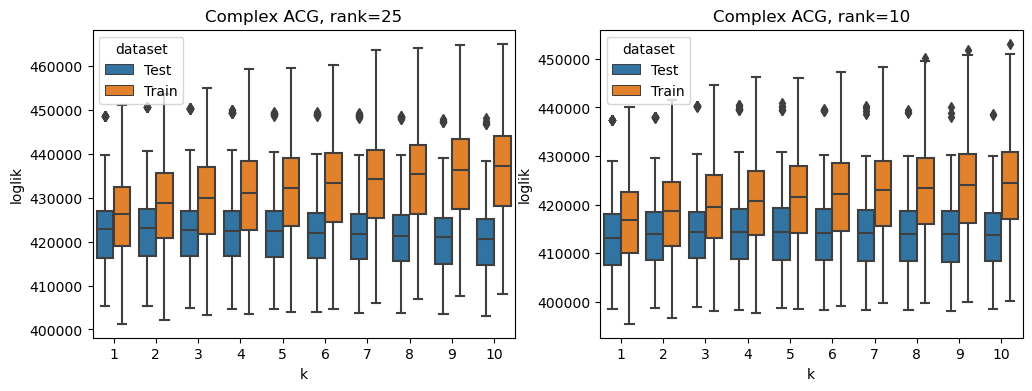

In [44]:
fig,axs = plt.subplots(1,2,figsize=(12,4))
#boxplot df3, K on the x-axis, loglik on the y-axis, left plot is train, right plot is test, only for rank-25 complex ACG
sns.boxplot(x='k',y='loglik',hue='dataset',data=df3[(df3['modelname']=='Complex_ACG') & (df3['rank']==25)],ax=axs[0])
axs[0].set_title('Complex ACG, rank=25')
sns.boxplot(x='k',y='loglik',hue='dataset',data=df3[(df3['modelname']=='Complex_ACG') & (df3['rank']==10)],ax=axs[1])
axs[1].set_title('Complex ACG, rank=10')

<Axes: xlabel='K', ylabel='loglik'>

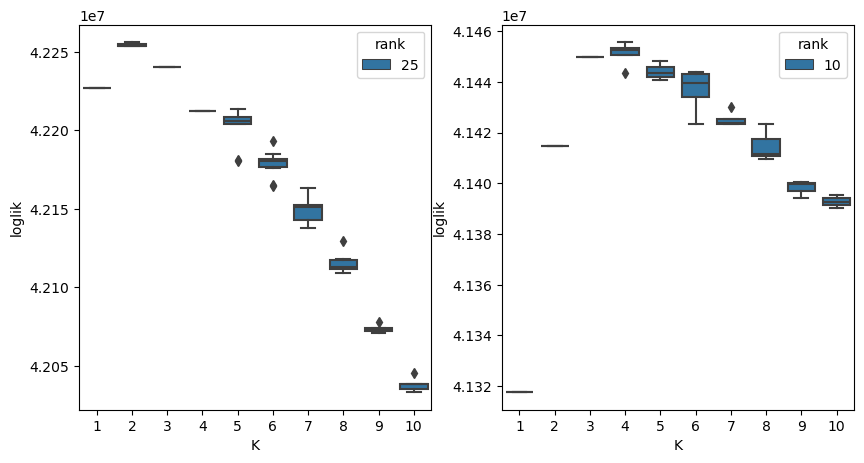

In [31]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
df21 = df2[df2['modelname']=='Complex_ACG']
df21 = df21[df21['dataset']=='Test']
df21 = df21[df21['rank']==25]
df22 = df2[df2['modelname']=='Complex_ACG']
df22 = df22[df22['dataset']=='Test']
df22 = df22[df22['rank']==10]
sns.boxplot(data=df21,x='K',y='loglik',hue='rank',ax=axs[0])
sns.boxplot(data=df22,x='K',y='loglik',hue='rank',ax=axs[1])

In [32]:
df21[df21['K']==4]

,Unnamed: 0,modelname,init_method,LR,HMM,K,p,rank,inner,iter,train_loglik,test_loglik,loglik,dataset
321,0,Complex_ACG,dc,0,False,4,116,25,0,31,4.306409e+07,4.221229e+07,4.221229e+07,Test


<Axes: >

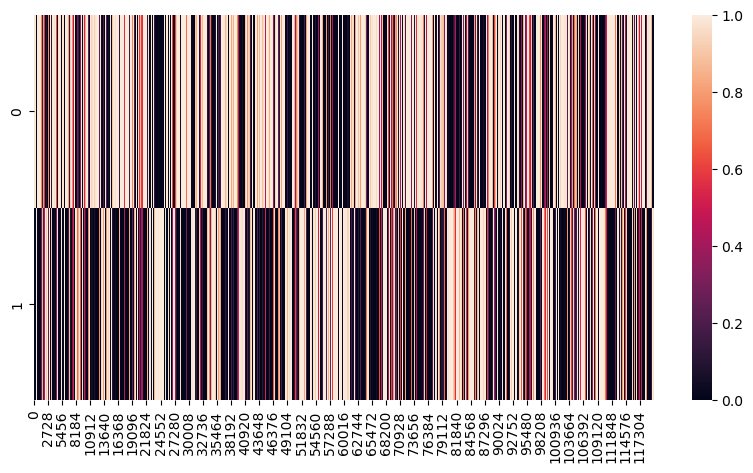

In [33]:
post = np.loadtxt('../data/results/116_results/posteriors/modelorder_realdata_Complex_ACG_K=2_rank=25_test_posterior_rank25_inner0.txt')
fig,axs = plt.subplots(1,1,figsize=(10,5))
sns.heatmap(post,ax=axs)


In [34]:
# #show another where post is averaged for every 1200 samples
# post = np.loadtxt('../data/results/116_results/posteriors/modelorder_realdata_Complex_ACG_K=4_test_posterior_rank25_inner5.txt')
# # post = post.reshape(4,1200,100)
# pi = np.mean(post,axis=1)
# pi
# # fig,axs = plt.subplots(1,1,figsize=(10,5))
# # sns.heatmap(post,ax=axs)

In [35]:
# #calculate the transition matrix of post, when post is binarized
# post = np.loadtxt('../data/results/116_results/posteriors/modelorder_realdata_Complex_ACG_K=4_test_posterior_rank25_inner5.txt')
# post_max = np.argmax(post,axis=0)
# T = np.zeros((4,4))
# for i in range(1,post.shape[1]):
#     T[post_max[i-1],post_max[i]] += 1
# T = T/np.sum(T,axis=1)[:,np.newaxis]
# plt.imshow(T)
# plt.colorbar()

In [36]:
# #model order NMI data
# df3 = pd.DataFrame()
# for modelname in modelnames:
#     print(modelname)
#     for rank in [10,25]:
#         for K in np.arange(2,11):
#             for train_test in ['train','test']:
#                 posteriors = []
#                 for inner in range(10):
#                     try:
#                         posterior = np.loadtxt('../data/results/116_results/posteriors/modelorder_realdata_'
#                                                 +modelname+'_K='+str(K)+'_'+train_test+'_posterior_rank'+str(rank)+'_inner'+str(inner)+'.txt')
#                         posteriors.append(posterior)
#                     except:
#                         try:
#                             posterior = np.loadtxt('../data/results/116_results/posteriors/modelorder_realdata_'
#                                                     +modelname+'_K='+str(K)+'_rank='+str(rank)+'_'+train_test+'_posterior_rank'+str(rank)+'_inner'+str(inner)+'.txt')
#                             posteriors.append(posterior)
#                         except:
#                             continue
#                 if len(posteriors)<2:
#                     continue
#                 NMIs = np.zeros((len(posteriors)))
#                 for i in range(len(posteriors)-1):
#                     NMIs[i] = calc_NMI(posteriors[i],posteriors[i+1])
#                 NMIs[-1] = calc_NMI(posteriors[-1],posteriors[0])
#                 df3_tmp = pd.DataFrame()
#                 df3_tmp['NMI'] = NMIs
#                 df3_tmp['modelname'] = modelname
#                 df3_tmp['rank'] = rank
#                 df3_tmp['K'] = K
#                 df3_tmp['dataset'] = train_test
#                 df3 = pd.concat([df3,df3_tmp],ignore_index=True)

In [37]:
df2

,Unnamed: 0,modelname,init_method,LR,HMM,K,p,rank,inner,iter,train_loglik,test_loglik,loglik,dataset
0,0,Complex_Watson,dc,0,False,1,116,10,0,12,3.762232e+07,3.745780e+07,3.762232e+07,Train
1,1,Complex_Watson,dc,0,False,1,116,10,1,12,3.762232e+07,3.745780e+07,3.762232e+07,Train
2,2,Complex_Watson,dc,0,False,1,116,10,2,12,3.762232e+07,3.745780e+07,3.762232e+07,Train
3,3,Complex_Watson,dc,0,False,1,116,10,3,12,3.762232e+07,3.745780e+07,3.762232e+07,Train
4,4,Complex_Watson,dc,0,False,1,116,10,4,12,3.762232e+07,3.745780e+07,3.762232e+07,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0,Complex_ACG,dc,0,False,10,116,25,0,387,4.368753e+07,4.204572e+07,4.204572e+07,Test
418,1,Complex_ACG,dc,0,False,10,116,25,1,271,4.368085e+07,4.203540e+07,4.203540e+07,Test
419,2,Complex_ACG,dc,0,False,10,116,25,2,303,4.368163e+07,4.203839e+07,4.203839e+07,Test
420,3,Complex_ACG,dc,0,False,10,116,25,3,174,4.367127e+07,4.203333e+07,4.203333e+07,Test


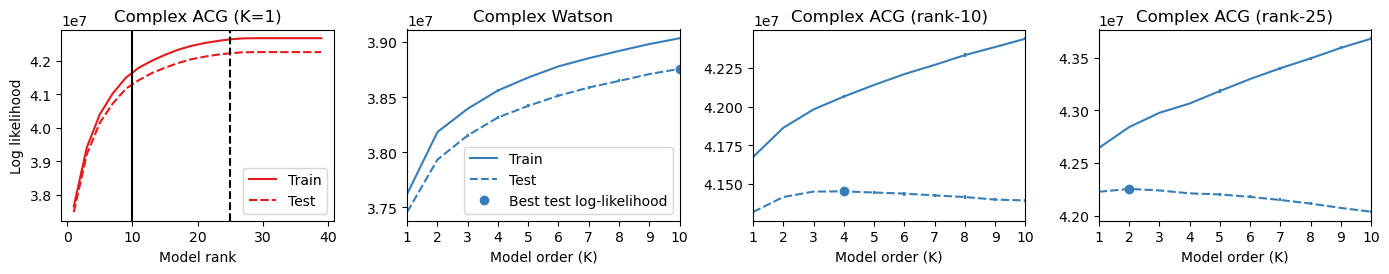

In [38]:
palette1 = sns.color_palette("Set1", n_colors=4)
fig,ax = plt.subplots(1,4,figsize=(14,3))

sns.lineplot(x='rank',y='loglik',style='dataset',data=df[df['modelname']=='Complex_ACG'],ax=ax[0],err_style='bars',color=palette1[0],legend=False);
ax[0].set_title('Complex ACG (K=1)')
ax[0].set_xlabel('Model rank')
ax[0].set_ylabel('Log likelihood')
ax[0].axvline(x=10, color='k', linestyle='-')
ax[0].axvline(x=25, color='k', linestyle='--')
ax[0].legend(['Train','Test'],loc='lower right')

df_tmp = df2[df2['modelname']=='Complex_Watson']
df_avg= df_tmp.groupby(['modelname','rank','dataset','K','init_method']).mean().reset_index()
df_avg_rank25 = df_avg[(df_avg['rank']==10) & (df_avg['dataset']=='Test')]
maxidx_rank25 = df_avg_rank25['loglik'].argmax()
sns.lineplot(x='K',y='loglik',style='dataset',data=df_tmp,ax=ax[1],err_style='bars',color=palette1[1],legend=False);
ax[1 ].plot(df_avg_rank25['K'].iloc[maxidx_rank25],df_avg_rank25['loglik'].iloc[maxidx_rank25],'o',color=palette1[1])
ax[1].set_title('Complex Watson')
ax[1].set_ylabel('')
ax[1].set_xlabel('Model order (K)')
ax[1].set_xticks(np.arange(1,11))
ax[1].set_xlim([1,10])
ax[1].legend(handles=[plt.plot([],'-',color=palette1[1])[0],plt.plot([],'--',color=palette1[1])[0],plt.plot([],'o',color=palette1[1])[0]],labels=['Train','Test','Best test log-likelihood'],loc='lower right')

df_tmp = df2[df2['modelname']=='Complex_ACG']
df_avg= df_tmp.groupby(['modelname','rank','dataset','K','init_method']).mean().reset_index()
df_avg_rank25 = df_avg[(df_avg['rank']==10) & (df_avg['dataset']=='Test')]
maxidx_rank25 = df_avg_rank25['loglik'].argmax()
sns.lineplot(x='K',y='loglik',style='dataset',data=df_tmp[df_tmp['rank']==10],ax=ax[2],err_style='bars',color=palette1[1],legend=False);
ax[2].plot(df_avg_rank25['K'].iloc[maxidx_rank25],df_avg_rank25['loglik'].iloc[maxidx_rank25],'o',color=palette1[1])
ax[2].set_title('Complex ACG (rank-10)')
ax[2].set_ylabel('')
ax[2].set_xlabel('Model order (K)')
ax[2].set_xticks(np.arange(1,11))
ax[2].set_xlim([1,10])

df_tmp = df2[df2['modelname']=='Complex_ACG']
df_avg= df_tmp.groupby(['modelname','rank','dataset','K','init_method']).mean().reset_index()
df_avg_rank25 = df_avg[(df_avg['rank']==25) & (df_avg['dataset']=='Test')]
maxidx_rank25 = df_avg_rank25['loglik'].argmax()
sns.lineplot(x='K',y='loglik',style='dataset',data=df_tmp[df_tmp['rank']==25],ax=ax[3],err_style='bars',color=palette1[1],legend=False);
ax[3].plot(df_avg_rank25['K'].iloc[maxidx_rank25],df_avg_rank25['loglik'].iloc[maxidx_rank25],'o',color=palette1[1])
ax[3].set_title('Complex ACG (rank-25)')
ax[3].set_ylabel('')
ax[3].set_xlabel('Model order (K)')
ax[3].set_xticks(np.arange(1,11))
ax[3].set_xlim([1,10])

plt.tight_layout()
plt.savefig('figs/realdata_modelorder_loglik.png',dpi=300,bbox_inches='tight')


In [39]:
# palette1 = sns.color_palette("Set1", n_colors=4)
# fig,ax = plt.subplots(3,4,figsize=(15,8),layout='constrained')
# for i,modelname in enumerate(modelnames):
#     #rank plots
#     if modelname!='Complex_Watson':
#         df_tmp = df[df['modelname']==modelname]
#         sns.lineplot(x='rank',y='loglik',style='dataset',data=df_tmp,ax=ax[0,i],err_style='bars',color=palette1[0],legend=False);
#         ax[0,i].set_title(modelnames2[i])
#         ax[0,i].set_xlabel('Model rank')
#         if i==1:
#             ax[0,i].set_ylabel('Log likelihood')
#         else:
#             ax[0,i].set_ylabel('')
#         #make a vertical line at rank 25
#         ax[0,i].axvline(x=10, color='k', linestyle='-')
#         ax[0,i].axvline(x=25, color='k', linestyle='--')
#     else:
#         handles = [plt.plot([],'r-')[0],plt.plot([],'r--')[0],
#             plt.plot([],'-',color=palette1[1])[0],plt.plot([],'--',color=palette1[1])[0],
#             plt.plot([],'-',color=palette1[2])[0],plt.plot([],'--',color=palette1[2])[0],plt.plot([],'-',color=palette1[3])[0],plt.plot([],'--',color=palette1[3])[0],
#             plt.plot([],'ko')[0]]
#         labels = ['K=1 train set','K=1 test set',
#             'Rank 1, train set','Rank 1, test set',
#             'Rank 10, train set','Rank 10, test set','Rank 25, train set','Rank 25, test set',
#             'Best obtained test log likelihood']
#         ax[0,i].legend(handles=handles,labels=labels,loc='center')
#         ax[0,i].axis('off')
    
#     #model order plots
#     df_tmp = df2[df2['modelname']==modelname]
#     df_avg= df_tmp.groupby(['modelname','rank','dataset','K','init_method']).mean().reset_index()
#     df_avg_rank25 = df_avg[(df_avg['rank']==25) & (df_avg['dataset']=='Test')]
#     maxidx_rank25 = df_avg_rank25['loglik'].argmax()
#     if modelname=='Complex_Watson':
#         sns.lineplot(x='K',y='loglik',style='dataset',data=df_tmp,ax=ax[1,i],err_style='bars',color=palette1[1],legend=False);
#         ax[1,i].plot(df_avg_rank25['K'].iloc[maxidx_rank25],df_avg_rank25['loglik'].iloc[maxidx_rank25],'o',color=palette1[1])
#     else:
#         sns.lineplot(x='K',y='loglik',style='dataset',hue='rank',data=df_tmp,ax=ax[1,i],err_style='bars',palette=palette1[2:],hue_order=[10,25],legend=False);
#         df_avg_rank10 = df_avg[(df_avg['rank']==10) & (df_avg['dataset']=='Test')]
#         maxidx_rank10 = df_avg_rank10['loglik'].argmax()
#         ax[1,i].plot(df_avg_rank10['K'].iloc[maxidx_rank10],df_avg_rank10['loglik'].iloc[maxidx_rank10],'o',color=palette1[2])
#         ax[1,i].plot(df_avg_rank25['K'].iloc[maxidx_rank25],df_avg_rank25['loglik'].iloc[maxidx_rank25],'o',color=palette1[3])

#     ax[1,i].set_title(modelnames3[i])
#     if i==0:
#         ax[1,i].set_ylabel('Log likelihood')
#     else:
#         ax[1,i].set_ylabel('')
#     ax[1,i].set_xlabel('Model order (K)')
#     ax[1,i].set_xticks(np.arange(1,11))
#     ax[1,i].set_xlim([1,10]) 
    
#     # #NMI plots
#     # df_tmp = df3[df3['modelname']==modelname]
#     # if modelname=='Complex_Watson':
#     #     sns.lineplot(x='K',y='NMI',style='dataset',data=df_tmp,ax=ax[2,i],err_style='bars',color=palette1[1],legend=False);
#     # else:
#     #     sns.lineplot(x='K',y='NMI',style='dataset',hue='rank',data=df_tmp,ax=ax[2,i],err_style='bars',palette=palette1[2:],hue_order=[10,25],legend=False);
#     # ax[2,i].set_title(modelnames3[i])
#     # if i==0:
#     #     ax[2,i].set_ylabel('Normalized mutual information')
#     # else:
#     #     ax[2,i].set_ylabel('')
#     # ax[2,i].set_xlabel('Model order (K)')
#     # ax[2,i].set_xticks(np.arange(2,11))
#     # ax[2,i].set_ylim([0,1]) 
#     # ax[2,i].set_xlim([1,10]) 
# fig.savefig('figs/116_realdata.png',bbox_inches='tight')

In [40]:
# fig,ax = plt.subplots(1,1)
# handles = [plt.plot([],'r-')[0],plt.plot([],'r--')[0],
#     plt.plot([],'-',color=palette1[1])[0],plt.plot([],'--',color=palette1[1])[0],
#     plt.plot([],'-',color=palette1[2])[0],plt.plot([],'--',color=palette1[2])[0],plt.plot([],'-',color=palette1[3])[0],plt.plot([],'--',color=palette1[3])[0],
#     plt.plot([],'ko')[0]]
# labels = ['K=1 train log-likelihood','K=1 test log-likelihood',
#     'Rank 1, train log-likelihood','Rank 1, test log-likelihood',
#     'Rank 10, train log-likelihood','Rank 10, test log-likelihood','Rank 25, train log-likelihood','Rank 25, test log-likelihood',
#     'Best obtained test log likelihood']
# ax.legend(handles=handles,labels=labels,loc='lower right')
# ax.axis('off')



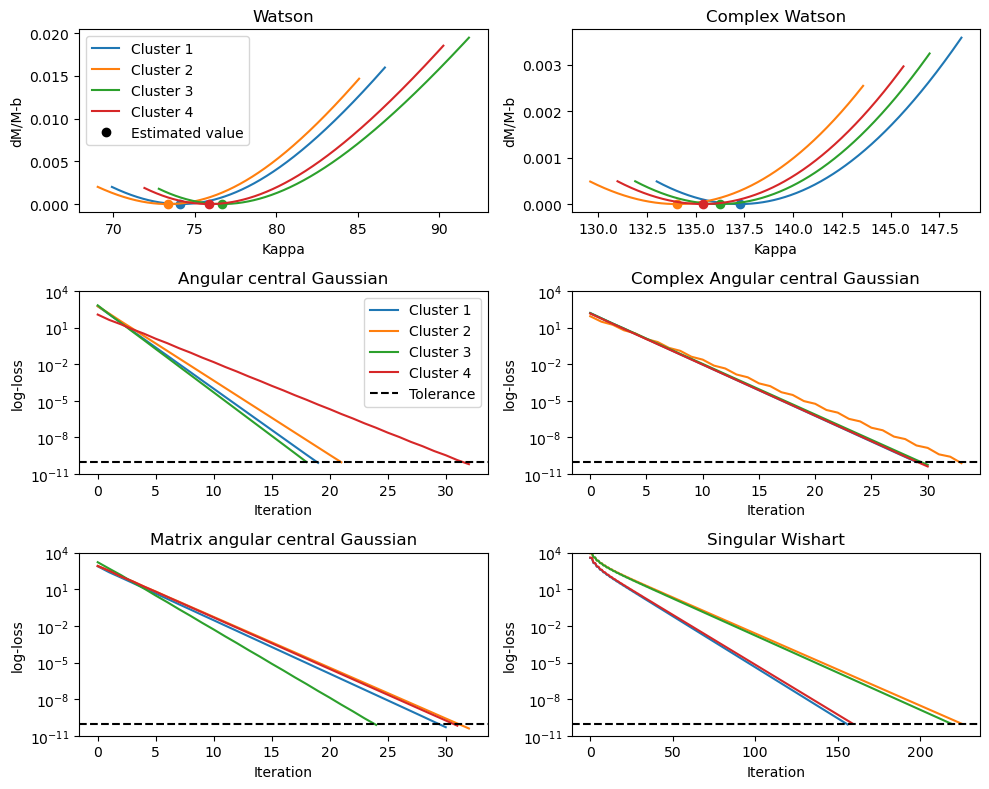

In [41]:
#2x3 subplot
palette = sns.color_palette("tab10")
modelnames5 = ['Watson','Complex_Watson','ACG','Complex_ACG','MACG','SingularWishart']
fig, ax = plt.subplots(3,2,figsize=(10,8))
for i,modelname in enumerate(modelnames5):
    lines = []
    for k in range(4):
        if 'Watson' in modelname:
            kappas = np.loadtxt('loss_curves/'+modelname+'_kappas'+str(k+1)+'.txt')
            fs = np.loadtxt('loss_curves/'+modelname+'_fs'+str(k+1)+'.txt')
            l = ax[i//2,i%2].plot(kappas,fs,label='Cluster '+str(k+1),color=palette[k])
            lines.append(l)
            minfs = np.min(fs)
            minfs_kappa = kappas[np.argmin(fs)]
            p = ax[i//2,i%2].plot(minfs_kappa,minfs,'o',label='Estimated value',color=palette[k])
            lines.append(p)
        else:
            loss = np.loadtxt('loss_curves/'+modelname+'_loss'+str(k+1)+'.txt')
            ax[i//2,i%2].plot(loss,color=palette[k])
            #plot dashes horizontal line at 1e-10
    if 'Watson' in modelname:
        ax[i//2,i%2].set_ylabel('dM/M-b')
        ax[i//2,i%2].set_xlabel('Kappa')
    else:
        ax[i//2,i%2].axhline(y=1e-10, color='k', linestyle='--')
        ax[i//2,i%2].set_ylabel('log-loss')
        ax[i//2,i%2].set_xlabel('Iteration')
        ax[i//2,i%2].set_yscale('log')
        ax[i//2,i%2].set_ylim([1e-11,1e4])
    if i==0:
        # ax[i//2,i%2].legend(handles=[lines[0][0],lines[2][0],lines[4][0],lines[6][0],lines[7][0]],labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Estimated value'])
        ax[i//2,i%2].legend(handles=[lines[0][0],lines[2][0],lines[4][0],lines[6][0],plt.plot([],'ko')[0]],labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Estimated value'])
        ax[i//2,i%2].set_title('Watson')
    elif i==2:
        ax[i//2,i%2].legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Tolerance'])
        ax[i//2,i%2].set_title('Angular central Gaussian')
    elif i==4:
        ax[i//2,i%2].set_title('Matrix angular central Gaussian')
    elif i==1:
        ax[i//2,i%2].set_title('Complex Watson')
    elif i==3:
        ax[i//2,i%2].set_title('Complex Angular central Gaussian')
    elif i==5:
        ax[i//2,i%2].set_title('Singular Wishart')
    
plt.tight_layout()
plt.savefig('loss_curves.png')
    